Chapter 04 검증 메트릭
------

### 주요 측정 항목

분류 학습에서 주로 사용하는 메트릭
- Accuracy
- Precision
- recall
- F1-score
- AUC(Area Under the ROC curve)
- 로그 손실
- P@K(정밀도 at k)
- AP@k(평균정밀도 at k)
- MAP@k(Mean Average Precision at k)

회귀학습에서 일반적으로 사용하는 메트릭
- MAE(Mean Absolute Error)
- MSE(Mean Squared Error)
- RMSE(Root Mean Squared Error)
- RMSLE(Root Mean Squared Log Error)
- MPE(Mean Percentage Error)
- MAPE(Mean Absolute Percentage Error)
- R^2

이진 분류 문제
- 기흉 판별 문제
- 학습 데이터 / 검증 데이터
  - 학습 데이터의 각각 세트에는 양성 50 / 음성 50장 - 총 100장 샘플
- 샘플의 개수가 같을 때는 일반적으로 정확도, 정밀도, 리콜, F1 Score를 이용

In [1]:
# 정확도 : 모델이 얼마나 정확하게 분류하는지를 측정

def accuracy(y_true, y_pred):
    """
    정확도를 계산하는 함수
    :param y_true: 타겟 값의 목록
    :param y_pred: 예측 값의 목록
    :return: 정확도
    """
    
    correct_counter = 0
    
    for yt, yp in zip(y_true, y_pred):
        if yt == yp:
            correct_counter += 1
            
    return correct_counter / len(y_true)

In [2]:
from sklearn import metrics

l1 = [0, 1, 1, 1, 0, 0, 0, 1]
l2 = [0, 1, 0, 1, 0, 1, 0, 0]

metrics.accuracy_score(l1, l2)

/opt/conda/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


0.625

데이터를 바꿔보자
- 180개의 음성 / 20개의 양성
- 각각의 세트에는 90개의 음성 / 10개의 양성

타겟 변수가 편향되어 있을 경우
- 하나의 범주가 다른 범주보다 훨씬 많을 때
- 모델의 정확도를 높이는 것은 도움이 되지 않음
- 정밀도를 사용하는 것이 이럴 때는 도움

몇 가지 용어
- TP(True Positive) : 이미지가 기흉이 있다고 예측했고, 실제로 기흉이 있는 경우 -> 모델이 양의 범주라고 맞게 예측한 경우
- TN(True Negative) : 이미지가 정상이라고 예측했고, 실제로 기흉이 없는 이미지인 경우 -> 모델이 음의 범주라고 맞게 예측한 경우
- FP(False Positive) : 이미지가 기흉이 있다고 예측했지만, 실제로 기흉이 없는 이미지인 경우 -> 모델이 양의 범주라고 잘못 예측한 경우
- FN(False Negative) : 이미지가 정상이라고 예측했지만, 실제로 기흉이 있는 이미지인 경우 -> 모델이 음의 범주라고 잘못 예측한 경우

In [14]:
def true_positive(y_true, y_pred):
    """
    TP를 계산하는 함수
    :param y_true: 타겟 값의 목록
    :param y_pred: 예측 값의 목록
    :return: TP의 개수
    """

    tp = 0

    for yt, yp in zip(y_true, y_pred):
        if yt == 1 and yp == 1:
            tp += 1

    return tp


def true_negative(y_true, y_pred):
    """
    TN를 계산하는 함수
    :param y_true: 타겟 값의 목록
    :param y_pred: 예측 값의 목록
    :return: TN의 개수
    """

    tn = 0

    for yt, yp in zip(y_true, y_pred):
        if yt == 0 and yp == 0:
            tn += 1

    return tn


def false_positive(y_true, y_pred):
    """
    FP를 계산하는 함수
    :param y_true: 타겟 값의 목록
    :param y_pred: 예측 값의 목록
    :return: FP의 개수
    """

    fp = 0

    for yt, yp in zip(y_true, y_pred):
        if yt == 0 and yp == 1:
            fp += 1

    return fp


def false_negative(y_true, y_pred):
    """
    FN를 계산하는 함수
    :param y_true: 타겟 값의 목록
    :param y_pred: 예측 값의 목록
    :return: FN의 개수
    """

    fn = 0

    for yt, yp in zip(y_true, y_pred):
        if yt == 1 and yp == 0:
            fn += 1

    return fn

In [15]:
l1 = [0, 1, 1, 1, 0, 0, 0, 1]
l2 = [0, 1, 0, 1, 0, 1, 0, 0]

true_positive(l1, l2), true_negative(l1, l2)

(2, 3)

In [16]:
false_positive(l1, l2), false_negative(l1, l2)

(1, 2)

정확도 = (TP + TN) / (TP + FP + FN + TN)

In [18]:
def accuracy_v2(y_true, y_pred):
    """
    tp/tn/fp/fn 을 사용하여 정확도를 계산하는 함수
    :param y_true: 타겟 값의 목록
    :param y_pred: 예측 값의 목록
    :return: 정확도
    """

    tp = true_positive(y_true, y_pred)
    tn = true_negative(y_true, y_pred)
    fp = false_positive(y_true, y_pred)
    fn = false_negative(y_true, y_pred)
    
    accuracy_score = (tp + tn) / (tp + tn + fp + fn)
    
    return accuracy_score

In [19]:
accuracy_v2(l1, l2)

0.625

**정밀도 = TP / (TP + FP)**

예를 들면....
- 편향된 데ㅣ터로 만든 모델이 90개의 음성 이미지 중 80개를 정확하게 예측하고 10개의 양성 이미지 중 8개를 정확하게 예측했다고 가정
- 이 경우 정확도는 88%
- 100개의 이미지 중, 10개의 음성 이미지와 2개의 양성 이미지를 잘못 예측
  - TP : 8, TN : 80, FP : 10, FN : 2
  - 정밀도를 계산하면 8 / (8 + 10) = 0.444
  - 모델이 양성이라고 예측한 경우, 예측한 44.4% 맞았다고 해석할 수 있다.

In [11]:
def precision(y_true, y_pred):
    """
    정밀도를 계산하는 함수
    :param y_true: 타겟 값의 목록
    :param y_pred: 예측 값의 목록
    :return: 정밀도
    """

    tp = true_positive(y_true, y_pred)
    fp = false_positive(y_true, y_pred)

    precision_result = (tp) / (tp + fp)

    return precision_result

In [17]:
l1 = [0, 1, 1, 1, 0, 0, 0, 1]
l2 = [0, 1, 0, 1, 0, 1, 0, 0]

precision(l1, l2)

0.6666666666666666

Recall = TP / (TP + FN)
- 8 / (8 + 2) = 0.8
- 모델이 양성 이미지 중 80%를 맞게 예측했다고 해석

In [20]:
def recall(y_true, y_pred):
    """
    리콜을 계산하는 함수
    :param y_true: 타겟 값의 목록
    :param y_pred: 예측 값의 목록
    :return: 리콜
    """

    tp = true_positive(y_true, y_pred)
    fn = false_negative(y_true, y_pred)

    recall_result = (tp) / (tp + fn)

    return recall_result

In [21]:
recall(l1, l2)

0.5

좋은 모델?
- 정밀도와 리콜이 모두 높아야 함
- 대부분의 모델은 확률을 예측 -> 범주로 전환하기 위해 보통 0.5(50%)의 기준점을 사용
- 때로는 적합하지 않음
- 기준점에 따른 정밀도와 리콜의 변화를 그래프로 그릴 수 있음
- PR Curve(precision-recall)

In [22]:
y_true = [0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 1, 0]
y_pred = [0.02638412, 0.11114267, 0.31620708,
            0.0490937, 0.0191491, 0.17554844,
            0.15952202, 0.03819563, 0.11639273,
            0.079377, 0.08584789, 0.39095342,
            0.27259048, 0.03447096, 0.04644807,
            0.03543574, 0.18521942, 0.05934905,
            0.61977213, 0.33056815]

In [23]:
precisions = []
recalls = []

# how we assumed these thresholds is a long story
thresholds = [0.0490937 , 0.05934905, 0.079377,
            0.08584789, 0.11114267, 0.11639273,
            0.15952202, 0.17554844, 0.18521942,
            0.27259048, 0.31620708, 0.33056815,
            0.39095342, 0.61977213]
# for every threshold, calculate predictions in binary
# and append calculated precisions and recalls
# to their respective lists

for i in thresholds:
    temp_prediction = [1 if x >= i else 0 for x in y_pred]

    p = precision(y_true, temp_prediction)
    r = recall(y_true, temp_prediction)
    
    precisions.append(p)
    recalls.append(r)

In [25]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

matplotlib.rc('xtick', labelsize=20)
matplotlib.rc('ytick', labelsize=20)

%matplotlib inline

/opt/conda/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/opt/conda/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


Text(0, 0.5, 'Precision')

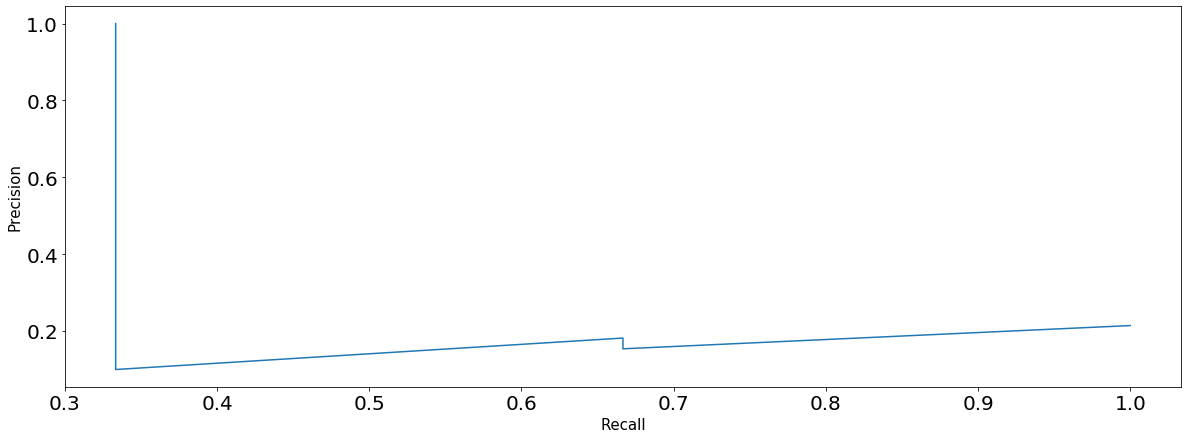

In [28]:
plt.figure(figsize=(20, 7))
plt.plot(recalls, precisions)
plt.xlabel('Recall', fontsize=15)
plt.ylabel('Precision', fontsize=15)

정밀도와 리콜이 동시에 높은 기준점을 선택하기는 어려움

F1 Score 는 정밀도와 리콜을 조합한 메트릭으로 정밀도와 리콜의 조화평균으로 정의
- 정밀도를 P
- 리콜을 R
- F1-Score = 2PR / (P + R) = 2TP / (2TP + FP + FN)

In [29]:
def f1(y_true, y_pred):
    """
    f1 score 을 계산하는 함수
    :param y_true: 타겟 값의 목록
    :param y_pred: 예측 값의 목록
    :return: f1 score
    """

    p = precision(y_true, y_pred)
    r = recall(y_true, y_pred)

    f1_score_result = (2 * p * r) / (p + r) 

    return f1_score_result

In [30]:
from sklearn import metrics

In [31]:
y_true = [0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
            1, 0, 0, 0, 0, 0, 0, 0, 1, 0]
y_pred = [0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
            1, 0, 0, 0, 0, 0, 0, 0, 1, 0]
f1(y_true, y_pred)

0.5714285714285715

In [32]:
metrics.f1_score(y_true, y_pred)

0.5714285714285715

정밀도와 리콜을 따로 확인하는 대신, F1 스코어를 사용할 수 있음
- 0에서 1 사이 값을 가짐
- 완벽한 예측 모델의 F1 스코어 역시 0에서 1 사이 값을 가진다.
- 완벽한 예측 모델은 1을 가짐
- 편한된 데이터의 경우!!!! 정확도 대신 F1 Score(혹은 precision, recall) 을 사용하라

**TPR** 도 중요한 용어
- True Positive Rate
- TPR = TP / (TP + FN)
- recall 과 동일
- TPR 과 recall 은 민감도(Sensitivity) 라고도 불림

In [33]:
def tpr(y_true, y_pred):
    """
    tpr 계산하는 함수
    :param y_true: 타겟 값의 목록
    :param y_pred: 예측 값의 목록
    :return: tpr
    """
    return recall(y_true, y_pred)

**FPR**
- False Positive Rate
- FPR = FP / (TN + FP)
- 1 - FPR 은 특이도(specificity) 혹은 TNR(True Negative Rate) 라고도 부름

가장 중요한 용어는 TPR, FPR

In [34]:
def fpr(y_true, y_pred):
    """
    fpr 계산하는 함수
    :param y_true: 타겟 값의 목록
    :param y_pred: 예측 값의 목록
    :return: fpr
    """
    
    fp = false_positive(y_true, y_pred)
    tn = true_negative(y_true, y_pred)
    
    fpr_result = fp / (fp + tn)
    
    return fpr_result


In [35]:
tpr_list = []
fpr_list = []

# 타겟 값
y_true = [0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1]

# 샘플의 타겟 값이 1일 확률
y_pred = [0.1, 0.3, 0.2, 0.6, 0.8, 0.05, 0.9, 0.5, 0.3, 0.66, 0.3, 0.2, 0.85, 0.15, 0.99]

# 기준점들
thresholds = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.85, 0.9, 0.99, 1.0]

for thresh in thresholds:
    temp_pred = [1 if x >= thresh else 0 for x in y_pred]
    
    temp_tpr = tpr(y_true, temp_pred)
    temp_fpr = fpr(y_true, temp_pred)
    
    tpr_list.append(temp_tpr)
    fpr_list.append(temp_fpr)

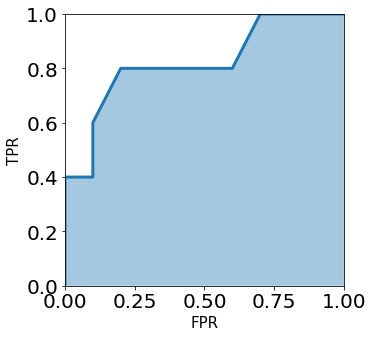

In [39]:
plt.figure(figsize=(5, 5))
plt.fill_between(fpr_list, tpr_list, alpha=0.4)
plt.plot(fpr_list, tpr_list, lw=3)
plt.xlim(0, 1.0)
plt.ylim(0, 1.0)
plt.xlabel('FPR', fontsize=15)
plt.ylabel('TPR', fontsize=15)
plt.show()

이 커브를 **ROC(Receiver Operating Characteristic) 커브** 라고 함
- ROC 커브 아래의 면적은 AUC(Area Under ROC Curve) 라고 함(편향된 이진분류 학습에서 자주 사용)

In [40]:
from sklearn import metrics

y_true = [0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1]
y_pred = [
    0.1, 0.3, 0.2, 0.6, 0.8, 0.05,
    0.9, 0.5, 0.3, 0.66, 0.3, 0.2,
    0.85, 0.15, 0.99
]
metrics.roc_auc_score(y_true, y_pred)

0.8300000000000001

AUC 는 0에서 1사이의 값을 가진다.
- AUC = 1
  - 완벽한 모델, 대부분 검증에 실수가 있었을 가능성이 있음
  - 데이터 처리와 검증 파이프라인을 점검
  - 실수가 아니면 만세
- AUC = 0
  - 완벽하게 틀린 (혹은 완벽한) 모델
  - 예측 확률 p 를 1-p 로 반전해보세요
  - 다른 것도 점검해보고...
- AUC = 0.5
  - 랜덤한 모델
  - 이진분류에서 모든 타겟 변수를 0.5로 예측하면 AUC가 0.5가 된다.
  
0 ~ 0.5 의 AUC 를 가지는 모델은 랜덤보다 못함을 의미함
- 대부분 범주를 잘못 적용했을 때 일어남

AUC 해석 방법
- if...AUC = 0.85

> 기흉 이미지 중 임의로 한 이미지를 선택하고 정상 이미지 중 임의로 한 이미지를 선택하면, 기흉 이미지에 대한 모델의
예측 값이 정상 이미지에 대한 예측 값보다 높을 확률이 85%임을 의미

시험 데이터에 대한 예측을 할 떄
- 필요에 따라 어느 경우에는 확률을 -> 모델의 예측 값이 이미 확률이므로 별도 작업 불필요
- 어느 경우에는 실제 범주를 예측 해야 함 -> 기준점을 선택해야 함
  - 이진분류의 경우 예측 확률과 기준점으로 다음과 같이 예측 범주를 결정
  - 예측범주 = 예측 확률 >= 기준점
  - 즉, 예측 확률이 기준점과 같거나 높은 샘플의 예측 범주는 1이고 나머지 샘플의 예측 범주는 0이 됨
 
참고 문서
- https://bioinformaticsandme.tistory.com/328


기준저을 선택하는데 ROC 커브 사용 가능
- 기준점이 FPR과 TPR에 영향을 주는지, 어떻게 FP와 TP에 영향을 주는지 알 수 있음
- 예를 들어...낮은 FP를 원하면 기준점을 높여야 함 -> 이 경우 FN 는 높아짐
- 트레이드 오프를 고려하여 최적의 기준점을 찾아야 함

In [41]:
# empty lists to store true positive
# and false positive values
tp_list = []
fp_list = []

# actual targets
y_true = [0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1]

# predicted probabilities of a sample being 1
y_pred = [
    0.1, 0.3, 0.2, 0.6, 0.8, 0.05,
    0.9, 0.5, 0.3, 0.66, 0.3, 0.2,
    0.85, 0.15, 0.99
]

# some handmade thresholds
thresholds = [
    0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.85, 0.9, 0.99, 1.0
]

# loop over all thresholds
for thresh in thresholds:
    # calculate predictions for a given threshold
    temp_pred = [1 if x >= thresh else 0 for x in y_pred]
    # calculate tp
    temp_tp = true_positive(y_true, temp_pred)
    # calculate fp
    temp_fp = false_positive(y_true, temp_pred)
    # append tp and fp to lists
    tp_list.append(temp_tp)
    fp_list.append(temp_fp)

보통 ROC 커브의 좌상단에 해당하는 기준점이 좋은 선택
- 그림 참고
- 기준점이 0.6일 때 비교적 낮은 FP(2개 혹은 20%)를 유지하며 높은 TP(4개 혹은 80%) 얻을 수 있음

AUC는 이진분류 메트릭으로 널리 사용

**log loss(로그 손실)**도 중요한 개념이다.

Log Loss = - 1.0 * ( target * log(prediction) + (1 - target) * log(1 - prediction) )
- y 는 0이나 1의 값을 갖는 타겟 변수
- p는 샘플이 범주 1에 속할 확률

복수의 샘플의 경우 로그 손실은 개별 샘플에 대한 로그 손실이 평균 값
- 로그 손실은 오차가 큰 예측 값에 큰 패널티를 준다는 것!
- 실제 범주가 1인 샘플을 0으로 예측하거나 실제 범주가 0인 샘플을 1로 예측하면 로그 손실은 무한대가 됨

In [42]:
import numpy as np

def log_loss(y_true, y_proba):
    """
    log loss 계산하는 함수
    :param y_true: 타겟 값의 목록
    :param y_proba: 예측 값의 목록
    :return: log loss
    """

    # 극단적인 확률 값을 조정하는데 사용할 epsilon 값
    epsilon = 1e-15
    
    # 샘플 별 로그 손실을 저장할 목록
    loss = []
    
    # 모든 타겟 값과 예측 값에 대해 로그 손실을 계산
    
    for yt, yp in zip(y_true, y_proba):
        
        # 확률 값을 아래와 같이 조정
        # 0 -> 1e-15
        # 1 -> 1-1e-15
        # 왜 위와 같이 조정하냐면....
        yp = np.clip(yp, epsilon, 1 - epsilon)
        
        temp_loss = - 1.0 * (yt * np.log(yp) + (1 - yt) * np.log(1-yp))
        
        # 로그 손실 목록에 추가
        loss.append(temp_loss)
        
    return np.mean(loss)

In [43]:
y_true = [0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1]
y_proba = [
    0.1, 0.3, 0.2, 0.6, 0.8, 0.05,
    0.9, 0.5, 0.3, 0.66, 0.3, 0.2,
    0.85, 0.15, 0.99
]
log_loss(y_true, y_proba)

0.49882711861432294

In [44]:
from sklearn import metrics

metrics.log_loss(y_true, y_proba)

0.49882711861432294

로그 손실의 구현은 간단하지만...해석이 어려움
- 다른 메트릭보다 많은 페널티를 부여
- 범주 1에 속한 샘플이 범주 1에 속할 확률을 51% 예측한 경우 로그 손실은....

```bash
- 1.0 * ( 1 * log(0.51) + (1 - 1) * log(1 – 0.51) ) = 0.67
```

범주 0에 속한 샘플이 범주 1 에 속할 확률을 49%로 예측한 경우 로그 손실은....

```bash
- 1.0 * ( 0 * log(0.49) + (1 - 0) * log(1 – 0.49) ) = 0.67
```

즉, 0.5 를 기준점으로 사용하면 완벽하게 범주를 맞출 수 있음에도 불구하고 로그 손실은 여전히 높음

로그 손실을 사용할 때는 확실하지 않은 예측(확률 값 50% 주위)은 로그 손실을 높인다는 점을 염두 해야 함

----

다중범주분류 문제
- multi-class classification 
- multi-class classification 에 대해서도 정밀도와 리콜을 구할 수 있음
- 모든 범주의 값을 조합하는데 세 가지 방법이 있음
  - Macro averaged precision(매크로 평균 정밀도) : calculate precision for all classes individually and then average them, 각각의 범주의 정밀도를 계산한 후, 정밀도의 평균을 계산
  - Micro averaged precision(마이크로 평균 정밀도) : calculate class wise true positive and false positive and then use that to calculate overall precision, 모든 범주에 걸쳐 TP 와 FP 를 합산한 후 정밀도를 계산
  - Weighted precision(가중 평균 정밀도) : same as macro but in this case, it is weighted average depending on the number of items in each class, 각각의 범주의 정밀도를 계산한 후, 각 범주에 해당하는 샘플 개수를 가중치로 정밀도의 가중 평균을 계산

In [47]:
def macro_precision(y_true, y_pred):
    """
    macro_precision 계산하는 함수
    :param y_true: 타겟 값의 목록
    :param y_proba: 예측 값의 목록
    :return: macro_precision
    """

    # 타겟 값의 목록에서 고유 값의 개수를 찾아 범주의 개수를 구한다.
    num_classes = len(np.unique(y_true))

    # 정밀도를 0으로 초기화
    precision = 0

    # 모든 범주에 대해 계산한다.
    for class_ in range(num_classes):
        # 현재 범주 이외의 범주는 음의 범주로 간주
        temp_true = [1 if p == class_ else 0 for p in y_true]
        temp_pred = [1 if p == class_ else 0 for p in y_pred]

        # 현재 범주에 대한 tp를 계산
        tp = true_positive(temp_true, temp_pred)

        # 현재 범주에 대한 fp를 계산
        fp = false_positive(temp_true, temp_pred)

        # 현재 범주에 대한 정밀도를 계산
        temp_precision = tp / (tp + fp)

        # 모든 범주에 대한 정밀도를 합산
        precision += temp_precision

    # 모든 범주의 정밀도의 합을 범주의 개수로 나누어 매크로 평균 정밀도 계산
    precision /= num_classes
    
    return precision


import numpy as np
def micro_precision(y_true, y_pred):
    """
    Function to calculate micro averaged precision
    :param y_true: list of true values
    :param y_pred: list of predicted values
    :return: micro precision score
    """
    # find the number of classes by taking
    # length of unique values in true list
    num_classes = len(np.unique(y_true))
    # initialize tp and fp to 0
    tp = 0
    fp = 0
    # loop over all classes
    for class_ in range(num_classes):
        # all classes except current are considered negative
        temp_true = [1 if p == class_ else 0 for p in y_true]
        temp_pred = [1 if p == class_ else 0 for p in y_pred]
        # calculate true positive for current class
        # and update overall tp
        tp += true_positive(temp_true, temp_pred)
        # calculate false positive for current class
        # and update overall tp
        fp += false_positive(temp_true, temp_pred)
    # calculate and return overall precision
    precision = tp / (tp + fp)
    
    return precision


from collections import Counter
import numpy as np
def weighted_precision(y_true, y_pred):
    """
    Function to calculate weighted averaged precision
    :param y_true: list of true values
    :param y_pred: list of predicted values
    :return: weighted precision score
    """
    # find the number of classes by taking
    # length of unique values in true list
    num_classes = len(np.unique(y_true))
    # create class:sample count dictionary
    # it looks something like this:
    # {0: 20, 1:15, 2:21}
    class_counts = Counter(y_true)
    # initialize precision to 0
    precision = 0
    # loop over all classes
    for class_ in range(num_classes):
        # all classes except current are considered negative
        temp_true = [1 if p == class_ else 0 for p in y_true]
        temp_pred = [1 if p == class_ else 0 for p in y_pred]
        # calculate tp and fp for class
        tp = true_positive(temp_true, temp_pred)
        fp = false_positive(temp_true, temp_pred)
        # calculate precision of class
        temp_precision = tp / (tp + fp)
        # multiply precision with count of samples in class
        weighted_precision = class_counts[class_] * temp_precision
        # add to overall precision
        precision += weighted_precision
    # calculate overall precision by dividing by
    # total number of samples
    overall_precision = precision / len(y_true)
    
    return overall_precision

In [48]:
from sklearn import metrics
y_true = [0, 1, 2, 0, 1, 2, 0, 2, 2]
y_pred = [0, 2, 1, 0, 2, 1, 0, 0, 2]

print(macro_precision(y_true, y_pred))
print(metrics.precision_score(y_true, y_pred, average="macro"))

print(micro_precision(y_true, y_pred))
print(metrics.precision_score(y_true, y_pred, average="micro"))

print(weighted_precision(y_true, y_pred))
print(metrics.precision_score(y_true, y_pred, average="weighted"))

0.3611111111111111
0.3611111111111111
0.4444444444444444
0.4444444444444444
0.39814814814814814
0.39814814814814814


마찬가지로 다중범주에서의 리콜도 구현할 수 있음
- 정밀도와 리콜은 TP, FP, FN으로 계산하로 F1 은 정밀도와 리콜로 계산 

In [49]:
def weighted_f1(y_true, y_pred):
    """
    Function to calculate weighted f1 score
    :param y_true: list of true values
    :param y_proba: list of predicted values
    :return: weighted f1 score
    """
    # find the number of classes by taking
    # length of unique values in true list
    num_classes = len(np.unique(y_true))
    # create class:sample count dictionary
    # it looks something like this:
    # {0: 20, 1:15, 2:21}
    class_counts = Counter(y_true)
    # initialize f1 to 0
    f1 = 0
    # loop over all classes
    for class_ in range(num_classes):
        # all classes except current are considered negative
        temp_true = [1 if p == class_ else 0 for p in y_true]
        temp_pred = [1 if p == class_ else 0 for p in y_pred]
        # calculate precision and recall for class
        p = precision(temp_true, temp_pred)
        r = recall(temp_true, temp_pred)
        # calculate f1 of class
        if p + r != 0:
            temp_f1 = 2 * p * r / (p + r)
        else:
            temp_f1 = 0
        # multiply f1 with count of samples in class
        weighted_f1 = class_counts[class_] * temp_f1
        # add to f1 precision
        f1 += weighted_f1
    # calculate overall F1 by dividing by
    # total number of samples
    overall_f1 = f1 / len(y_true)
    return overall_f1

In [50]:
from sklearn import metrics
y_true = [0, 1, 2, 0, 1, 2, 0, 2, 2]
y_pred = [0, 2, 1, 0, 2, 1, 0, 0, 2]

In [51]:
weighted_f1(y_true, y_pred)

0.41269841269841273

In [53]:
metrics.f1_score(y_true, y_pred, average="weighted")

0.41269841269841273

confusion matrix

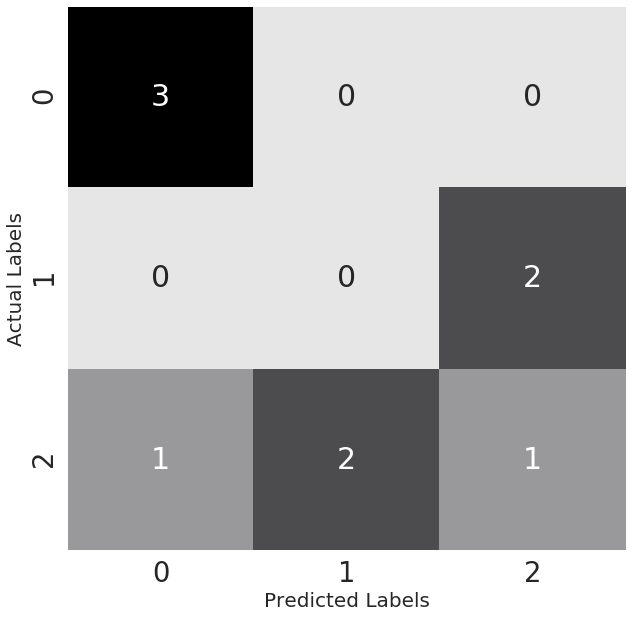

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

# some targets
y_true = [0, 1, 2, 0, 1, 2, 0, 2, 2]

#some predictions
y_pred = [0, 2, 1, 0, 2, 1, 0, 0, 2]

# get confusion matrix from sklearn
cm = metrics.confusion_matrix(y_true, y_pred)

# plot using matplotlib and seaborn
plt.figure(figsize=(10, 10))
cmap = sns.cubehelix_palette(
    50, hue=0.05, rot=0, light=0.9, dark=0, as_cmap=True)
sns.set(font_scale=2.5)
sns.heatmap(cm, annot=True, cmap=cmap, cbar=False)
plt.ylabel('Actual Labels', fontsize=20)
plt.xlabel('Predicted Labels', fontsize=20)
plt.show()

**multi-label classification**

다중 레이블 분류
- 각각의 샘플이 하나 혹은 복수의 범주에 속할 수 있음
- 책 참고(그림에서 여러 항목 추출...)